In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn import datasets
data=datasets.load_diabetes()

In [8]:
df=pd.DataFrame(data=data.data,columns=data.feature_names)
df["target"]=data.target

In [9]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [11]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

In [41]:
df.shape

(442, 11)

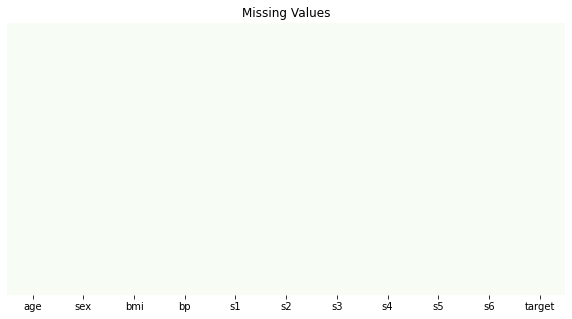

In [12]:
plt.figure(figsize=(10,5))
plt.title("Missing Values")
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap="Greens")

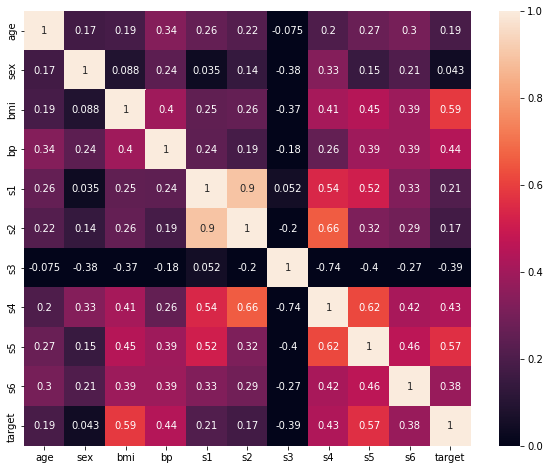

In [13]:
f = plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,vmin=0,vmax=1)

In [25]:
y=df.iloc[:,10].values
x=df.iloc[:,0:10].values

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1034)

##checking if train and test shape are equal for both features and labels


In [28]:
x_train.shape

(309, 10)

In [29]:
y_train.shape

(309,)

In [30]:
x_test.shape

(133, 10)

In [27]:
y_test.shape

(133,)

##Testing Linear Regression model

In [17]:
from sklearn.linear_model import LinearRegression

In [44]:
linear=LinearRegression()
linear.fit(x_train,y_train)
linear_pred=linear.predict(x_test);
print("Linear Regression accuracy: ")
print(linear.score(x_test,y_test))
print()
print()

Linear Regression accuracy: 
0.41049048357242557




#Linear Regression has accuracy of 41 percent

In [39]:
linear_pred

array([ 62.05985932, 118.77750604, 223.03852474, 160.41439483,
       139.89573204,  80.06332728, 117.70011028, 125.47656876,
        53.81716906, 198.14070102, 229.93218086, 188.34564244,
       175.77966284,  87.637184  , 176.00534958, 177.1428784 ,
       153.68222754, 165.33055657,  69.21239851, 185.76990215,
       204.15964927, 123.67140381, 223.43862077, 135.15913851,
       203.54207346, 255.72805528, 286.31526438, 183.6928494 ,
        66.64162507, 115.85536115,  99.65459995, 134.72116302,
       150.3885278 , 167.52788546, 223.4862665 , 152.95245505,
        88.86047844, 106.11795584,  98.22586703, 157.7890394 ,
       141.42772152, 161.37950686,  86.26159503, 119.80731008,
        58.46432051, 243.75055835,  41.57483309, 133.40780103,
       137.60443307, 213.88299028, 175.63435897, 252.6090508 ,
       123.44417211, 198.93738285, 187.63584121, 136.01470698,
       275.83077572, 179.82127349, 105.72637684,  83.87086401,
        84.71708951,  90.84770191, 138.41432323, 185.05

##Test set visualisation

In [49]:
linear.coef_

array([  42.66941314, -317.67134302,  526.96218041,  344.59513404,
       -897.06266581,  421.64860386,  184.75103321,  371.07144873,
        624.56630217,  188.07654696])

In [50]:
linear.intercept_

151.6182134849998

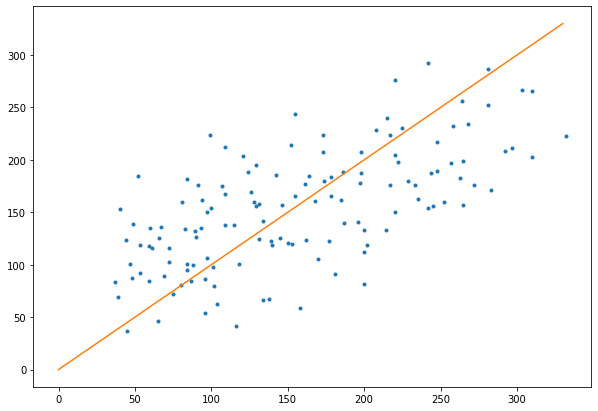

In [56]:
plt.figure(figsize=(10,7))
plt.plot(y_test,linear_pred,'.')
x = np.linspace(0, 330, 100)
y = x
plt.plot(x, y)
plt.show()